In [1]:
import os, sys
print(os.listdir('../../'))
print(os.getcwd())
sys.path.append("../")
sys.path.append("../src/network")
sys.path.append("../src")
print(os.getcwd())
import torch
import glob
from torch import optim
import numpy as np
from src.data.tokenizer import Tokenizer
import string
import os, sys
import torch.utils.data as D
import cv2
import numpy as np
from torchvision import transforms
from src.network.gen_model.gen_model import GenModel_FC
from torchvision.transforms import v2
from random import choices
import kornia as K
import kornia.feature as KF
from kornia_moons.viz import *
from src.data.data_loader import RIMES_data
from src.data.reader import read_rimes
import random
import matplotlib.pyplot as plt
from src.network.losses import Loss

['data', 'handwriting-recognition', 'htr_self_supervised', 'manuscript-dating-sn', 'mnist_pipeline', 'Paper-ext', 'self-supervised-mnist', 'Thesis', 'ws-siamese']
c:\Users\Lisa\Documents\GitHub\handwriting-recognition\small_experiments
c:\Users\Lisa\Documents\GitHub\handwriting-recognition\small_experiments


In [2]:
charset_base = string.ascii_lowercase + string.ascii_uppercase
max_text_length = 25
tokenizer = Tokenizer(chars=charset_base, max_text_length=max_text_length, self_supervised=1)

In [3]:
gen_model = GenModel_FC(tokenizer.maxlen, tokenizer.vocab_size, tokenizer.PAD).cuda()
gen_model.load_state_dict(torch.load('../src/network/gen_model/gen_model.model')) #load
gen_model.eval()

GenModel_FC(
  (enc_image): RecursiveScriptModule(
    original_name=ImageEncoder
    (model): RecursiveScriptModule(
      original_name=VGG
      (features): RecursiveScriptModule(
        original_name=Sequential
        (0): RecursiveScriptModule(original_name=Conv2d)
        (1): RecursiveScriptModule(original_name=InstanceNorm2d)
        (2): RecursiveScriptModule(original_name=ReLU)
        (3): RecursiveScriptModule(original_name=Conv2d)
        (4): RecursiveScriptModule(original_name=InstanceNorm2d)
        (5): RecursiveScriptModule(original_name=ReLU)
        (6): RecursiveScriptModule(original_name=Conv2d)
        (7): RecursiveScriptModule(original_name=InstanceNorm2d)
        (8): RecursiveScriptModule(original_name=ReLU)
        (9): RecursiveScriptModule(original_name=Conv2d)
        (10): RecursiveScriptModule(original_name=InstanceNorm2d)
        (11): RecursiveScriptModule(original_name=ReLU)
        (12): RecursiveScriptModule(original_name=MaxPool2d)
        (13):

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
input_size = (64, 216, 1)
num_style_imgs = 15 # num imgs for generator to extract style from
batch_size = 32
dataset = "iam"
dataset_path = os.path.join("..", "data", dataset, "words")
max_word_len = 10

In [6]:
data_train, data_valid, data_test, wid_train, wid_valid, wid_test = read_rimes(dataset_path, max_word_len)

train
number of words in train: 20552
number of wids in train: 499
Number of words per word length
2 4301
3 5306
4 4147
5 2841
6 2128
7 1829
valid
number of words in valid: 6112
number of wids in valid: 499
Number of words per word length
2 1281
3 1605
4 1264
5 808
6 637
7 517
test
number of words in test: 4892
number of wids in test: 499
Number of words per word length
2 1028
3 1288
4 984
5 663
6 495
7 434


In [7]:
data_train = RIMES_data(data_train, input_size=input_size, tokenizer=tokenizer, num_images=num_style_imgs, wids=wid_train)
# train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)


In [8]:
loss_class = Loss("vgg", tokenizer, device, 19)

c:\Users\Lisa\miniconda3\envs\python_310_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lisa\miniconda3\envs\python_310_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

### Same style, same or different content with synthetic images

207 209
of of
343 093
be of
552 334
de to
247 183
it in
034 339
of by
286 011
of of
217 107
so to
150 166
It it
090 169
of of
549 334
in to
173 671
in by
543 000
to me
209 090
to of
000 165
an of
330 174
we he
163 210
by of
339 040
to in
000 093
be of
583 260
Of of
332 341
as of
129 549
do of
552 160
is in
333 155
an He
522 086
to in
620 344
he he
333 094
to we
197 123
in in
094 114
as as
283 251
of of
263 256
of as
617 216
by he
343 207
it of
293 671
of of
112 278
to to
293 545
of is
338 334
be to
198 037
in of
238 202
of to
344 118
of to
293 056
an He
081 155
us in
015 336
he An
240 338
at so
302 520
if It
107 665
it my
537 235
is an
635 584
me as
651 000
at we
660 556
of up
152 000
of to
174 158
to of
563 550
my of
287 331
up of
340 202
in It
341 254
be on
525 126
or By
671 191
ne in
342 612
at is
301 585
me Dr
038 248
no It
000 288
of to
626 671
of to
156 217
as in
305 341
he by
246 248
is by
104 595
to de
193 568
on in
313 519
at if
594 223
is no
130 000
of to
256 339
at on
337 33

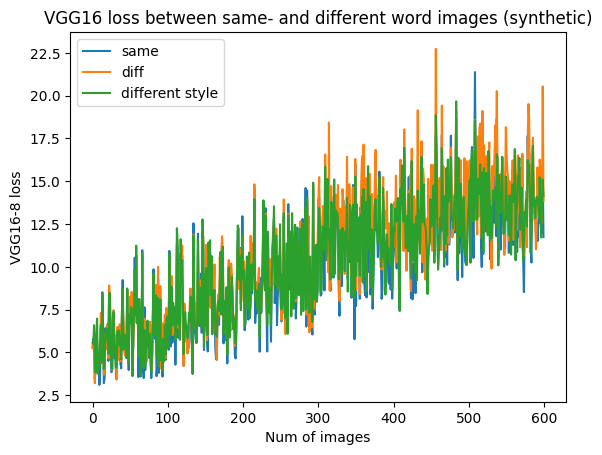

In [46]:
losses_same_synth = []
losses_diff_synth = []
losses_diff_s_synth = []
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.random.seed(42)

for num_char in range(2, 8):

    for j in range(100):
        img_idx = np.random.randint(len(data_train.img_paths))
        img, gen_input, gt_label, wid = data_train.__getitem__(img_idx)

        while len(tokenizer.decode(gt_label)) != num_char:
            img_idx = np.random.randint(len(data_train.img_paths))
            img, gen_input, gt_label, wid = data_train.__getitem__(img_idx)
        
        img_idx_diff = np.random.randint(len(data_train.img_paths))
        img_diff, gen_input_diff, gt_label_diff, _ = data_train.__getitem__(img_idx_diff)

        while (len(tokenizer.decode(gt_label_diff)) != num_char) and (tokenizer.decode(gt_label_diff) != tokenizer.decode(gt_label)):
            img_idx_diff = np.random.randint(len(data_train.img_paths))
            img_diff, gen_input_diff, gt_label_diff, _ = data_train.__getitem__(img_idx_diff)
        
        tries = 0
        while True:
            img_idx_diff_s = np.random.randint(len(data_train.img_paths))
            _, gen_input_diff, _, wid_diff_s = data_train.__getitem__(img_idx_diff_s)
            print(wid_diff_s, wid)
            tries += 1
            if wid_diff_s != wid:
                break

        
        print(tokenizer.decode(gt_label), tokenizer.decode(gt_label_diff))
        synth_imgs = []

        label = torch.from_numpy(np.array(gt_label)).cuda().long()
        label = torch.nn.functional.one_hot(label, 56).float()

        label_diff = torch.from_numpy(np.array(gt_label_diff)).cuda().long()
        label_diff = torch.nn.functional.one_hot(label_diff, 56).float()
        loss_same_sum = 0
        loss_diff_sum = 0
        loss_diff_s_sum = 0

        for i in range(60):
            _, gen_input, _, _ = data_train.__getitem__(img_idx)   
            _, gen_input_diff, _, _ = data_train.__getitem__(img_idx_diff_s)            

            gen_input = torch.from_numpy(gen_input).squeeze(1).unsqueeze(0).cuda()
            gen_input_diff = torch.from_numpy(gen_input_diff).squeeze(1).unsqueeze(0).cuda()

            synth_img = gen_model(gen_input, label.unsqueeze(0))
            synth_img_diff = gen_model(gen_input, label_diff.unsqueeze(0))
            synth_img_diff_s = gen_model(gen_input_diff, label.unsqueeze(0))

            img = img.cuda()

            loss_same_sum += loss_class.loss_func(synth_img, img).detach().cpu()
            loss_diff_sum += loss_class.loss_func(synth_img_diff, img).detach().cpu()
            loss_diff_s_sum += loss_class.loss_func(synth_img_diff_s, img).detach().cpu()

        losses_same_synth.append(loss_same_sum/60)
        losses_diff_synth.append(loss_diff_sum/60)
        losses_diff_s_synth.append(loss_diff_s_sum/60)
            # synth_imgs.append(synth_img[0][0].detach().cpu())

    # plt.imshow(img[0].cpu())
    # plt.show()

    # fig, axs = plt.subplots(10, 5, figsize=(10, 10))

    # # Flatten the axs array to iterate over all subplots
    # axs = axs.flatten()

    # for z in range(len(synth_imgs)):
    #     # Plot image
    #     axs[z].imshow(synth_imgs[z], cmap='gray')
    #     axs[z].axis('off')  # Turn off axis
    

    # plt.tight_layout()
    # plt.show()
plt.plot(losses_same_synth, label="same")
plt.plot(losses_diff_synth, label='diff')
plt.plot(losses_diff_s_synth, label='different style')
plt.legend()
plt.xlabel("Num of images")
plt.ylabel("VGG16-8 loss")
plt.title("VGG16 loss between same- and different word images (synthetic)")
plt.savefig("./vgg_loss_data_synth.png")
plt.show()
    


In [ ]:
np.save('./losses_samesynth.npy', losses_same_synth)
np.save('./losses_diffsynth.npy', losses_diff_synth)
np.save('./losses_samesynth_sstyle.npy', losses_diff_s_synth)

### Same style same or different content with real images

2
of 11
of 4
be 2
of 47
to 2
of 5
of 2
of 4
to 4
as 1
of 2
of 14
in 3
in 4
go 1
to 35
to 2
of 2
of 11
we 5
he 7
of 1
in 4
be 2
of 3
as 4
of 3
of 4
is 2
to 2
in 1
he 7
to 2
we 1
in 2
in 4
as 1
as 2
of 2
of 1
of 1
he 2
it 1
of 6
of 4
to 2
to 2
is 1
in 2
of 3
to 1
of 5
to 4
in 3
he 7
It 2
my 1
me 1
as 4
at 4
we 1
of 1
of 47
of 10
to 1
of 2
of 1
of 5
in 3
he 5
be 1
on 1
in 4
me 1
of 10
to 2
so 1
of 6
as 1
in 4
he 5
is 4
to 1
is 1
of 47
to 3
It 1
at 1
he 7
to 2
in 2
of 1
of 1
of 6
be 3
to 3
be 15
it 2
as 1
is 4
he 4
of 4
so 1
We 1
of 47
to 2
up 2
be 1
in 2
of 6
be 1
it 1
to 1
of 5
of 4
do 1
we 4
in 1
of 5
as 2
to 7
of 4
in 2
he 6
by 1
to 4
to 3
of 5
is 1
in 2
We 1
to 6
it 1
on 1
an 1
to 4
in 3
as 1
of 2
to 35
to 2
is 13
it 1
at 1
in 1
of 2
in 2
so 1
to 2
of 2
We 1
be 15
by 2
of 1
so 1
of 2
in 1
in 7
of 11
it 1
of 1
of 4
of 4
he 1
as 4
of 1
he 1
is 1
of 7
to 1
to 2
to 1
to 2
is 13
of 2
to 10
he 1
be 1
of 47
of 3
to 1
to 4
in 1
in 1
to 3
to 6
of 5
at 1
is 1
of 1
of 1
to 1
he 2
to 1
is 1
of 1


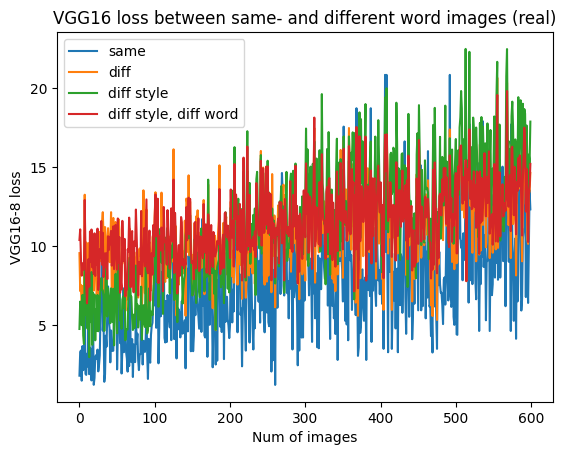

In [14]:
losses_same_real = []
losses_diff_real = []
losses_diff_s_real = []
losses_diff_s_diff_real = []
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.random.seed(42)

for num_char in range(2, 8):
    print(num_char)

    for j in range(100):
        # img_idx = np.random.randint(len(data_train.img_paths))
        # img, gen_input, gt_label, wid = data_train.__getitem__(img_idx)

        # same_style = data_train.wids[wid]

        # same_word_paths = [item[0] for item in same_style if (item[1] == tokenizer.decode(gt_label)) and (item[0] != data_train.img_paths[img_idx][0])]
        # diff_word_paths = [item[0] for item in same_style if (item[1] != tokenizer.decode(gt_label)) and (len(item[1]) != len(tokenizer.decode(gt_label)))]
        
        tries = 0
        while True:
            img_idx = np.random.randint(len(data_train.img_paths))
            img, gen_input, gt_label, wid = data_train.__getitem__(img_idx)

            if len(tokenizer.decode(gt_label)) == num_char:
                same_style = data_train.wids[wid]
                text_label = tokenizer.decode(gt_label)

                same_word_paths = [item[0] for item in same_style if (item[1] == text_label) and (item[0] != data_train.img_paths[img_idx][0])]
                diff_word_paths = [item[0] for item in same_style if (item[1] != text_label) and (len(item[1]) != len(text_label))]

                if len(same_word_paths) >= 1:
                    break
            tries += 1

            if tries >= 5000:
                break

        print(tokenizer.decode(gt_label), len(same_word_paths))

        while True:
            img_idx = np.random.randint(len(data_train.img_paths))
            _, gen_input, gt_label_, wid_diff_s = data_train.__getitem__(img_idx)
            
            if wid_diff_s != wid:
                if len(tokenizer.decode(gt_label_)) == num_char:
                    
                    wid_style = data_train.wids[wid_diff_s]
                    same_word_paths_s = [item[0] for item in wid_style if (item[1] == tokenizer.decode(gt_label_)) and (item[0] != data_train.img_paths[img_idx][0])]
                    diff_word_paths_s = [item[0] for item in wid_style if (item[1] != text_label) and (len(item[1]) != len(text_label))]
                
                    if len(same_word_paths_s) >= 1:
                        break

        
        print(tokenizer.decode(gt_label_), len(same_word_paths_s))
        
        img = img.cuda()
        loss_same = 0
        if len(same_word_paths) >= 1:
            for path in same_word_paths:
                img_same = 255 - cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img_same = data_train.transforms(img_same).cuda()
                
                loss_same += loss_class.loss_func(img_same, img).detach().cpu()
            losses_same_real.append(loss_same/len(same_word_paths))
        
        loss_diff = 0
        if len(diff_word_paths) >= 1:
            for path in diff_word_paths:
                img_diff = 255 - cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img_diff = data_train.transforms(img_diff).cuda()
                loss_diff += loss_class.loss_func(img_diff, img).detach().cpu()
            losses_diff_real.append(loss_diff/len(diff_word_paths))
        
        loss_same_diff_s = 0
        if len(same_word_paths_s) >= 1:
            for path in same_word_paths_s:
                img_sames = 255 - cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img_sames = data_train.transforms(img_sames).cuda()
                loss_same_diff_s += loss_class.loss_func(img_sames, img).detach().cpu()
                
            losses_diff_s_real.append(loss_same_diff_s/len(same_word_paths_s))
        
        loss_diff_s = 0
        if len(diff_word_paths_s) >= 1:
            for path in diff_word_paths_s:
                img_diff_s = 255 - cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img_diff_s = data_train.transforms(img_diff_s).cuda()
                loss_diff_s += loss_class.loss_func(img_diff_s, img).detach().cpu()
            losses_diff_s_diff_real.append(loss_diff_s/len(diff_word_paths_s))
            # print(losses_diff_s_real)

plt.plot(losses_same_real, label="same")
plt.plot(losses_diff_real, label='diff')
plt.plot(losses_diff_s_real, label="diff style")
plt.plot(losses_diff_s_diff_real, label="diff style, diff word")
plt.legend()
plt.xlabel("Num of images")
plt.ylabel("VGG16-8 loss")
plt.title("VGG16 loss between same- and different word images (real)")
plt.savefig("./vgg_loss_data_real.png")
plt.show()
    


In [16]:
losses_same_synth = np.load('./losses_samesynth.npy')
losses_diff_synth = np.load('./losses_diffsynth.npy')
losses_diff_s_synth = np.load('./losses_samesynth_sstyle.npy')

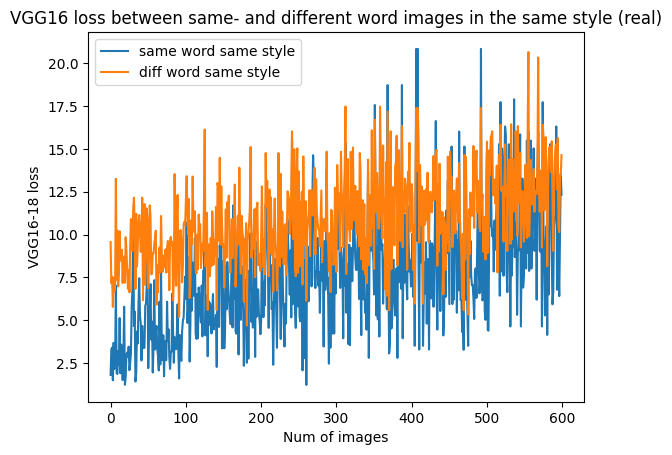

In [72]:
plt.plot(losses_same_real, label="same word same style")
plt.plot(losses_diff_real, label='diff word same style')
plt.legend()
plt.xlabel("Num of images")
plt.ylabel("VGG16-18 loss")
plt.title("VGG16 loss between same- and different word images in the same style (real)")
plt.savefig("./vgg_loss_data_real.png")
plt.show()

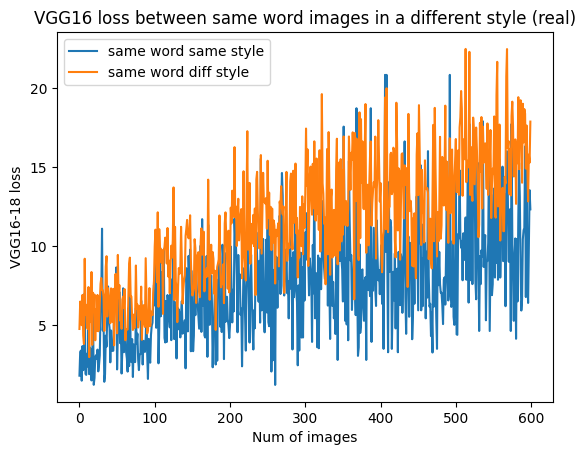

In [73]:
plt.plot(losses_same_real, label="same word same style")
plt.plot(losses_diff_s_real, label="same word diff style")
plt.legend()
plt.xlabel("Num of images")
plt.ylabel("VGG16-18 loss")
plt.title("VGG16 loss between same word images in a different style (real)")
plt.savefig("./vgg_loss_data_real_diff_s.png")
plt.show()

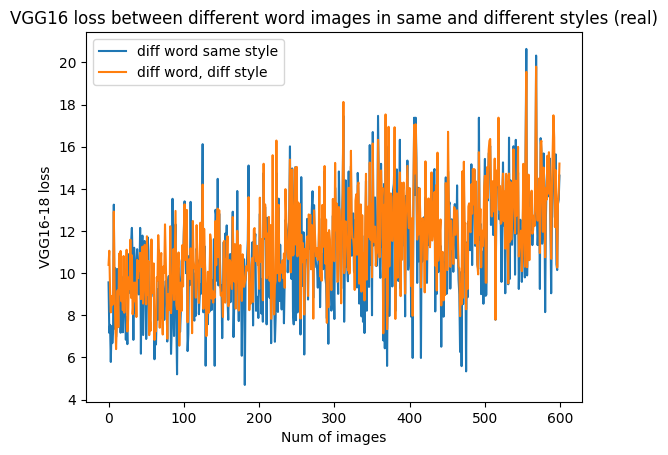

In [80]:
plt.plot(losses_diff_real, label='diff word same style')
plt.plot(losses_diff_s_diff_real, label="diff word, diff style")

plt.legend()
plt.xlabel("Num of images")
plt.ylabel("VGG16-18 loss")
plt.title("VGG16 loss between different word images in same and different styles (real)")
plt.savefig("./vgg_loss_data_real_diffwsames_diffwdiffs.png")
plt.show()

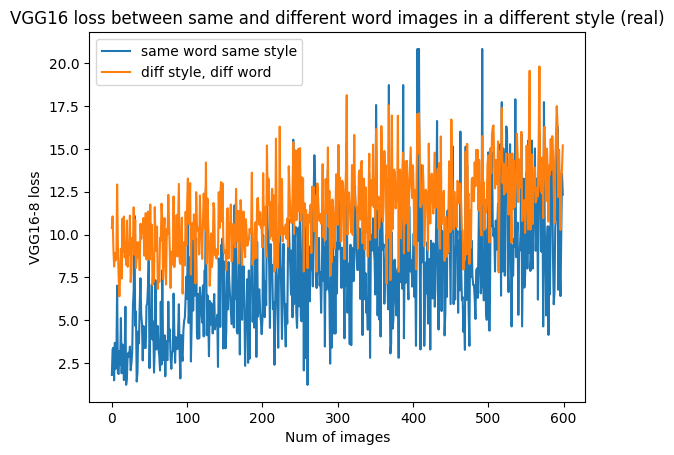

In [74]:
plt.plot(losses_same_real, label="same word same style")
plt.plot(losses_diff_s_diff_real, label="diff style, diff word")
plt.legend()
plt.xlabel("Num of images")
plt.ylabel("VGG16-8 loss")
plt.title("VGG16 loss between same and different word images in a different style (real)")
plt.savefig("./vgg_loss_data_real_diff_s_diff_w.png")
plt.show()

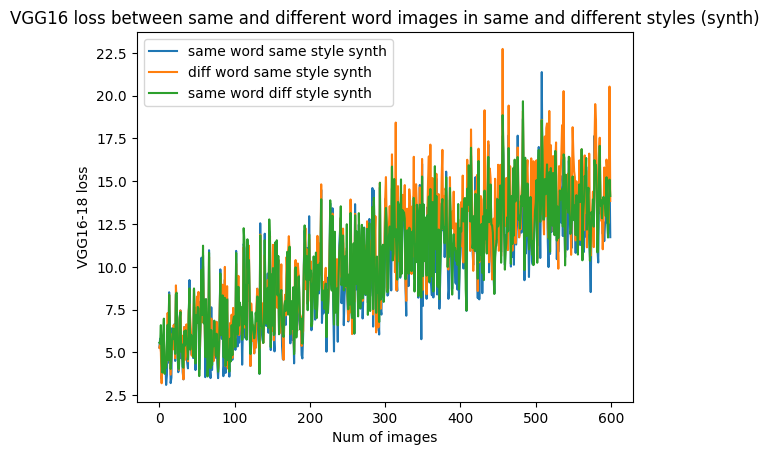

In [76]:
# plt.plot(losses_same_real, label="same")
# plt.plot(losses_diff_real, label='diff word same style')
# plt.plot(losses_diff_s_real, label="diff style")
# plt.plot(losses_diff_s_diff_real, label="diff word, diff style")
plt.plot(losses_same_synth, label="same word same style synth")
plt.plot(losses_diff_synth, label='diff word same style synth')
plt.plot(losses_diff_s_synth, label='same word diff style synth')
plt.legend()
plt.xlabel("Num of images")
plt.ylabel("VGG16-18 loss")
plt.title("VGG16 loss between same and different word images in same and different styles (synth)")
plt.savefig("./vgg_loss_data_synth_all.png")
plt.show()

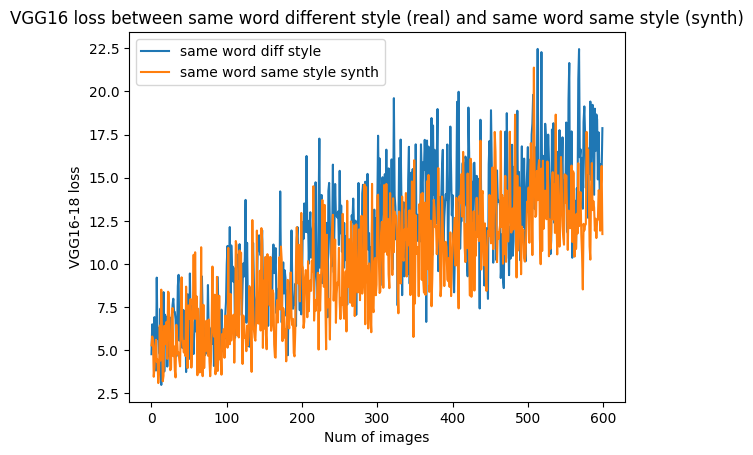

In [79]:
plt.plot(losses_diff_s_real, label="same word diff style")
plt.plot(losses_same_synth, label="same word same style synth")
plt.legend()
plt.xlabel("Num of images")
plt.ylabel("VGG16-18 loss")
plt.title("VGG16 loss between same word different style (real) and same word same style (synth)")
plt.savefig("./vgg_loss_data_real_synth_samewdiffs_samewsames.png")
plt.show()